In [5]:
import numpy as np
import pandas as pd


data = pd.read_excel('MOMENT2.xlsx')
print(data.shape)
data=data.dropna()
print(data.shape)

(70864, 46)
(70864, 46)


In [6]:
shape=data.shape
N=shape[0]

X = np.zeros((N,13,1))
Ls = np.zeros((N,3,1))


Y = np.zeros((N,13))
LPF = np.zeros((N,1))

for ii in range(0,N-1):
    q1 = int(data.iloc[ii,0])
    q2 = int(data.iloc[ii,1])
    q3 = int(data.iloc[ii,2])
    
    l1 = data.iloc[ii,3]
    l2 = data.iloc[ii,4]
    l3 = data.iloc[ii,5]

    
    
    
    X[ii,q1,0] = 1
    X[ii,q2,0] = 1
    X[ii,q3,0] = 1
    
    Ls[ii,0,0]=l1
    Ls[ii,1,0]=l2
    Ls[ii,2,0]=l3
    
    Y[ii,:] = data.iloc[ii][[10,12,15,18,21,24,27,30,33,36,39,42,45]]
    LPF[ii,0]= data.iloc[ii][6]

    
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]




    

In [7]:
import keras as krs
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras.utils import plot_model

# define two sets of inputs
inputA = krs.Input(shape=(13,1))
inputB = krs.Input(shape=(3,))

# the first branch operates on the first input
x = Conv1D(128, kernel_size=1, activation="relu")(inputA)
x = Conv1D(64, kernel_size=1, activation="relu")(x)
x = Conv1D(32, kernel_size=1, activation="relu")(x)
x = Conv1D(24, kernel_size=1, activation="relu")(x)
x = Conv1D(13, kernel_size=1, activation="relu")(x)
x = Flatten()(x)
x = Dense(13, activation="relu")(x)
x = krs.Model(inputs=inputA, outputs=x)

print(x.output)

# the second branch opreates on the second input
y = Dense(3, activation="linear")(inputB)
y = krs.Model(inputs=inputB, outputs=y)

print(y.output)

# combine the output of the two branches
combined = krs.layers.concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(24, activation="relu")(z)
z = Dense(13, activation="linear")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = krs.Model(inputs=[x.input, y.input], outputs=z)


model.compile(loss='mean_squared_error', optimizer=krs.optimizers.adam(clipnorm=1))
history1 = model.fit( [X,Ls[:,:,0]], Y, validation_data=([X,Ls[:,:,0]], Y), epochs=30, batch_size=32, verbose=1)  

 
    
    
plt.figure()
# Plot training & validation loss values
plt.plot(history1.history['loss'],label = 'mlp')
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Using TensorFlow backend.
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1




Tensor("dense_1/Relu:0", shape=(?, 13), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 3), dtype=float32)



Train on 70864 samples, validate on 70864 samples
Epoch 1/30
70864/70864 [==============================] - 10s 146us/step - loss: 135898.1426 - val_loss: 46374.5231
Epoch 2/30
70864/70864 [==============================] - 9s 123us/step - loss: 38793.8666 - val_loss: 33146.3090
Epoch 3/30
70864/70864 [==============================] - 9s 127us/step - loss: 30677.2469 - val_loss: 27403.8234
Epoch 4/30
70864/70864 [==============================] - 9s 126us/step - loss: 26930.2155 - val_loss: 25650.9812
Epoch 5/30
70864/70864 [==============================] - 9s 123us/step - loss: 25480.5123 - val_loss: 24580.9675
Epoch 6/30
70864/70864 [==============================] - 9s 123us/step - loss: 24798.9684 - val_loss: 24242.6447
Epoch 7/30
70864/70864 [==============================] - 9s 127us/step - loss: 24303.2287 - val_loss: 27432.3013
Epoch 8/30
70864/70864 [========

<Figure size 640x480 with 1 Axes>

[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [250. 500. 250.]
-2268.63
2430.6072


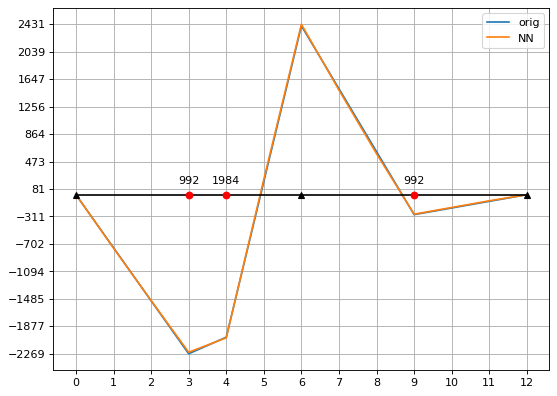

[0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [30. 15. 60.]
-589.51
554.2306


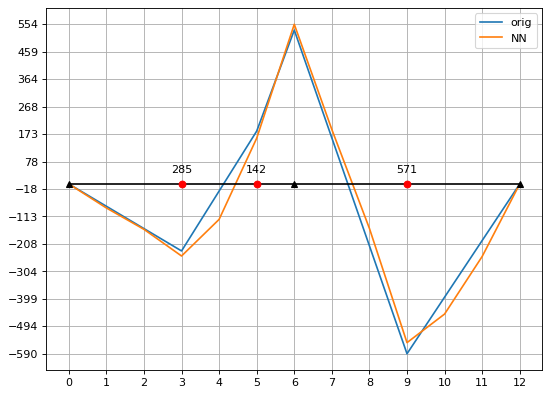

[0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [41.  20.5 82. ]
-616.886
661.2838


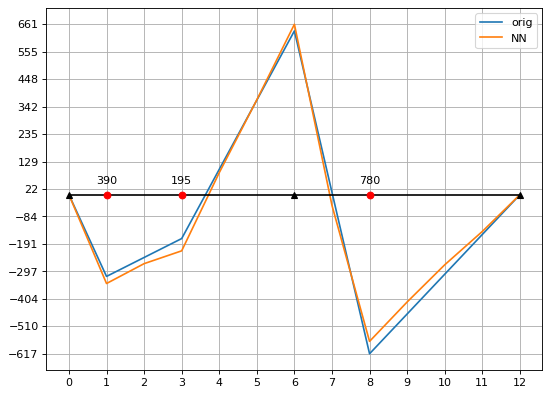

[0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [14. 28.  7.]
-264.2933
263.70938


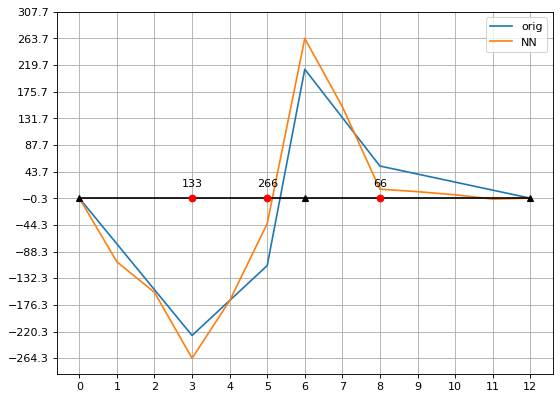

[0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [364. 182. 364.]
-2386.89
2624.6804


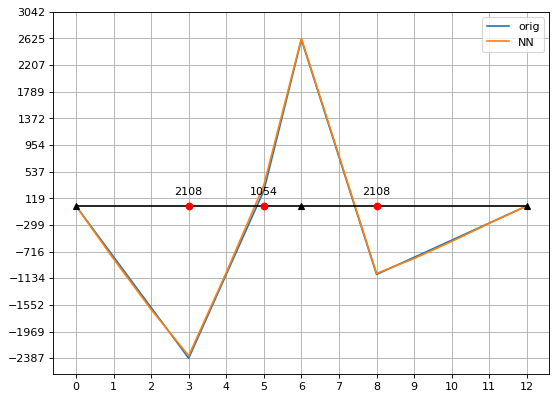

[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.] [41. 82. 82.]
-447.7514
970.458


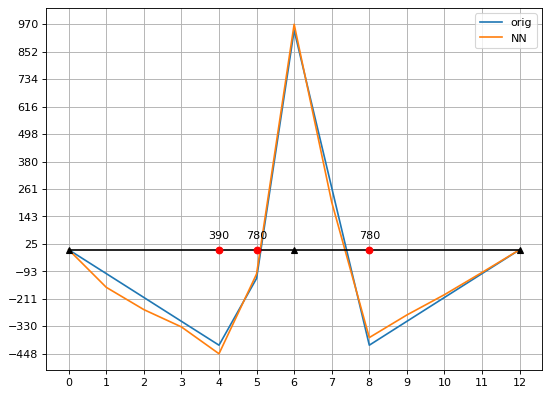

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [165.   82.5 330. ]
-1795.79
2337.0977


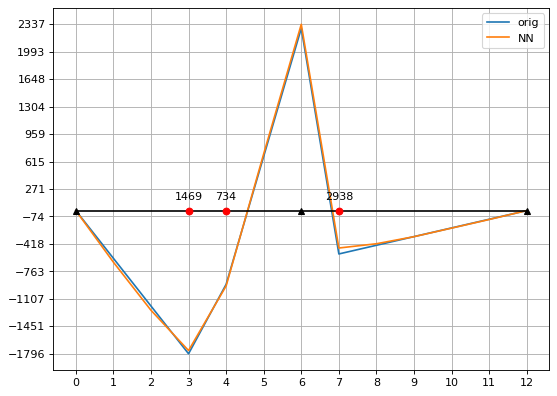

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.] [362. 724. 362.]
-2427.3994
2365.853


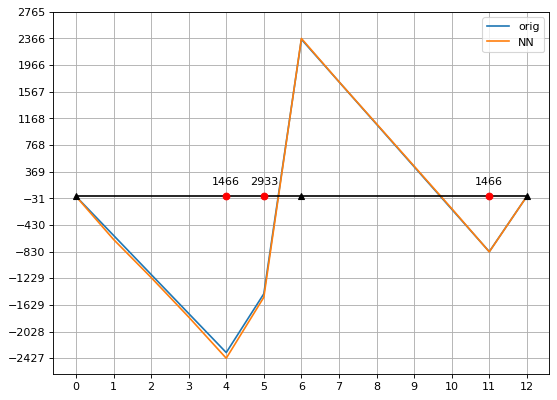

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.] [209. 418. 418.]
-2282.2307
2359.3262


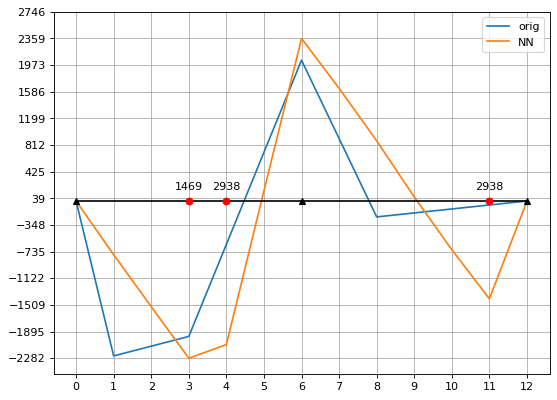

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [259.  129.5 518. ]
-2386.89
2436.2134


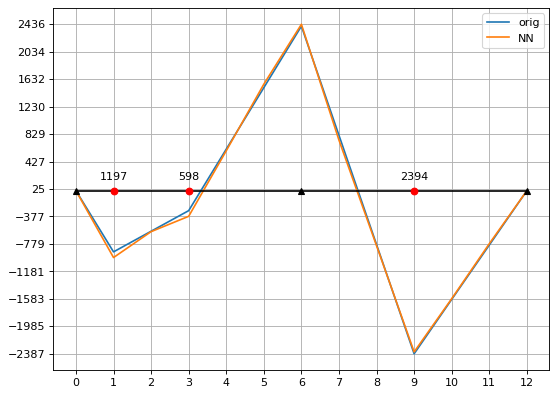

[0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [ 79.  158.   39.5]
-2033.92
992.12335


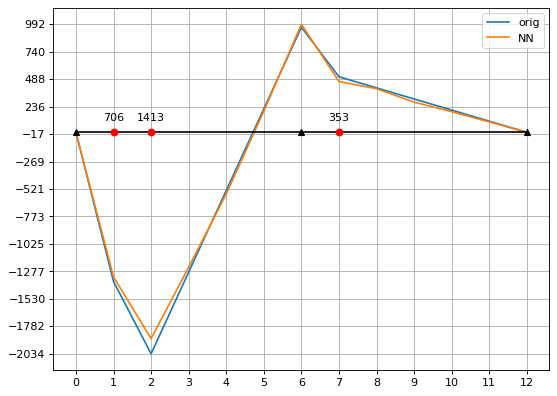

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [201.  201.  100.5]
-2266.17
1888.6909


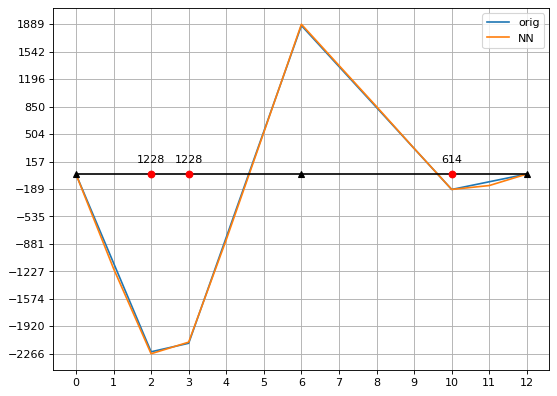

[0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [343.  171.5 171.5]
-2356.2434
2041.0104


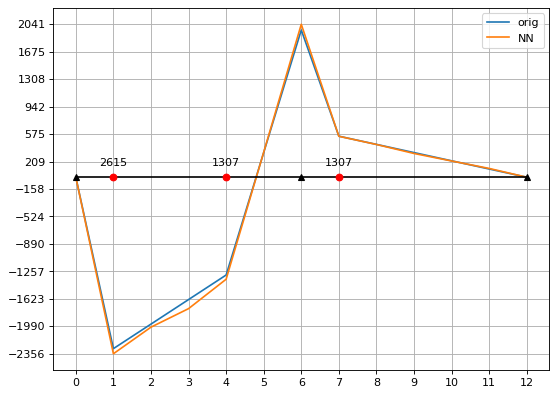

[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [44. 44. 44.]
-790.93365
596.4809


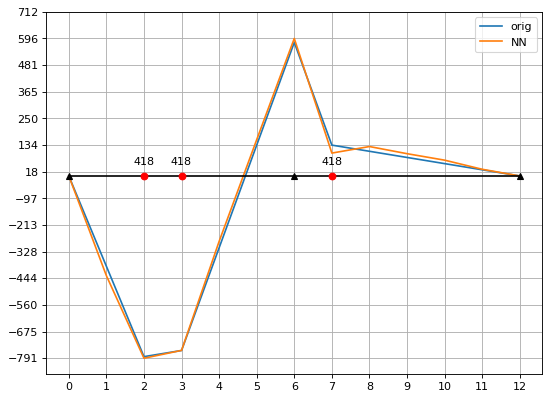

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [138.  69.  69.]
-1499.8846
779.95105


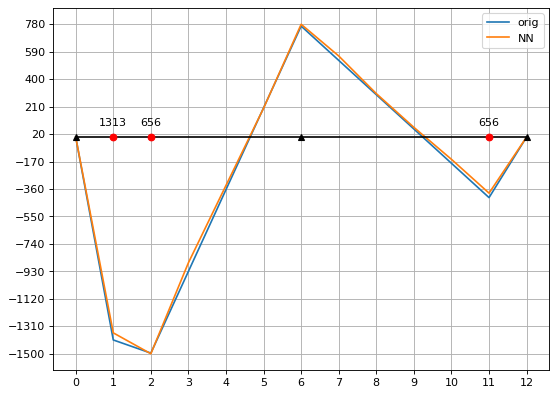

[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [212. 424. 212.]
-2268.63
2420.2761


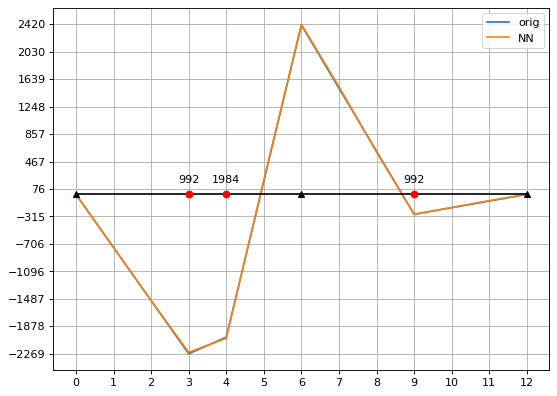

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [142. 284.  71.]
-2054.6538
2073.8337


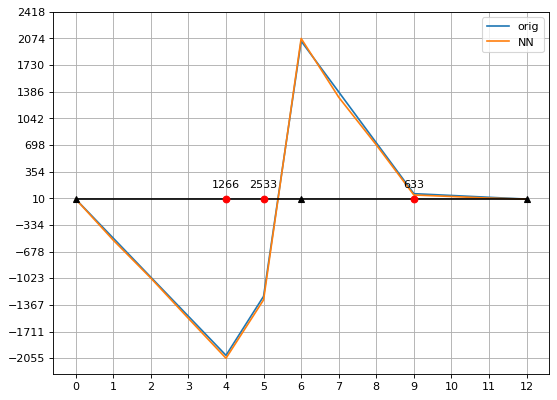

[0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [20. 20. 20.]
-293.382
274.40717


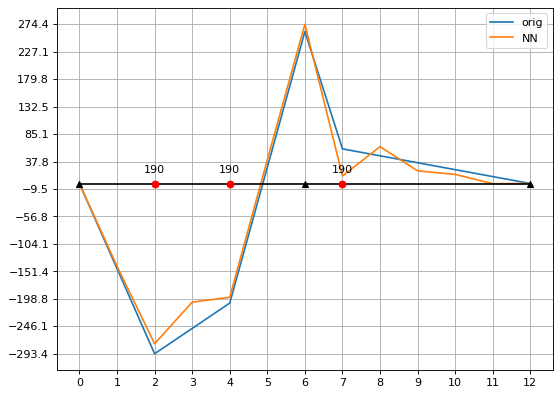

In [ ]:
y_pred1 = model.predict([X,Ls[:,:,0]])
import time
from matplotlib.pyplot import figure


for ii in [23477,5412,7354,2435,65754,7424,45444,45311,45434,31215,13453,34563,70000,7886,38657,23457,36788,3555]:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0])
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
    print(minimo)
    print(maximo)
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

In [9]:

np.set_printoptions(precision=3)



err = np.sum(np.abs(y_pred1-Y)/N,axis=0)
print("errors1\n ", err)





errors1
  [4.808e-02 5.842e+01 5.331e+01 5.881e+01 5.696e+01 4.407e+01 6.087e+01
 4.948e+01 4.666e+01 5.095e+01 4.670e+01 3.823e+01 1.122e-02]


In [10]:
Pos = np.zeros((13,13,1))
Pesos_05 = np.zeros((13,3,1))
Pesos_1 = np.zeros((13,3,1))
Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    Pesos_05[i,0,0] = 30*(i+1)
    Pesos_05[i,1,0] = 30*(i+1)/2
    Pesos_05[i,2,0] = 30*(i+1)/2
    Pesos_1[i,0,0] = 30*(i+1)
    Pesos_1[i,1,0] = 30*(i+1)
    Pesos_1[i,2,0] = 30*(i+1)
    Pesos_2[i,0,0] = 30*(i+1)
    Pesos_2[i,1,0] = 30*(i+1)*2
    Pesos_2[i,2,0] = 30*(i+1)*2
    
    
Inc_MOMENT_05 = model.predict([Pos,Pesos_05[:,:,0]])
Inc_MOMENT_1 = model.predict([Pos,Pesos_1[:,:,0]])
Inc_MOMENT_2 = model.predict([Pos,Pesos_2[:,:,0]])
print(Pesos_05)
print(Pesos_1)
print(Pesos_2)

[[[ 30.]
  [ 15.]
  [ 15.]]

 [[ 60.]
  [ 30.]
  [ 30.]]

 [[ 90.]
  [ 45.]
  [ 45.]]

 [[120.]
  [ 60.]
  [ 60.]]

 [[150.]
  [ 75.]
  [ 75.]]

 [[180.]
  [ 90.]
  [ 90.]]

 [[210.]
  [105.]
  [105.]]

 [[240.]
  [120.]
  [120.]]

 [[270.]
  [135.]
  [135.]]

 [[300.]
  [150.]
  [150.]]

 [[330.]
  [165.]
  [165.]]

 [[360.]
  [180.]
  [180.]]

 [[390.]
  [195.]
  [195.]]]
[[[ 30.]
  [ 30.]
  [ 30.]]

 [[ 60.]
  [ 60.]
  [ 60.]]

 [[ 90.]
  [ 90.]
  [ 90.]]

 [[120.]
  [120.]
  [120.]]

 [[150.]
  [150.]
  [150.]]

 [[180.]
  [180.]
  [180.]]

 [[210.]
  [210.]
  [210.]]

 [[240.]
  [240.]
  [240.]]

 [[270.]
  [270.]
  [270.]]

 [[300.]
  [300.]
  [300.]]

 [[330.]
  [330.]
  [330.]]

 [[360.]
  [360.]
  [360.]]

 [[390.]
  [390.]
  [390.]]]
[[[ 30.]
  [ 60.]
  [ 60.]]

 [[ 60.]
  [120.]
  [120.]]

 [[ 90.]
  [180.]
  [180.]]

 [[120.]
  [240.]
  [240.]]

 [[150.]
  [300.]
  [300.]]

 [[180.]
  [360.]
  [360.]]

 [[210.]
  [420.]
  [420.]]

 [[240.]
  [480.]
  [480.]]

 [[270.]
  [54

In [15]:
MOMENT05 =  pd.read_csv('moment_alpha05_beta05.csv', header=None)
MOMENT1 =  pd.read_csv('moment_alpha1_beta1.csv', header=None)
MOMENT2 =  pd.read_csv('moment_alpha2_beta2.csv', header=None)


def make_graph(_xx,_var,MOMENT):
    moment=[]
    load=[]
    for i in range(0,13):
        load.append(int(MOMENT.iloc[i][3]*MOMENT.iloc[i][6]))
        moment.append(MOMENT.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    



    figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    
    for i in range(0,13):
        maxes.append(max(max(_var[i]),max(moment[i])))
        mins.append(min(min(_var[i]),min(moment[i])))
        plt.plot(_xx,_var[i],'r',label=str(load[i])+'N-Rede') 
        plt.plot(_xx,moment[i],'b',label=str(load[i])+'N-Original')
        
    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    
    np.set_printoptions(precision=3)



    err = np.sum(np.abs((_var-moment)/moment*100)/12,axis=0)
    print("errors1\n ", err)

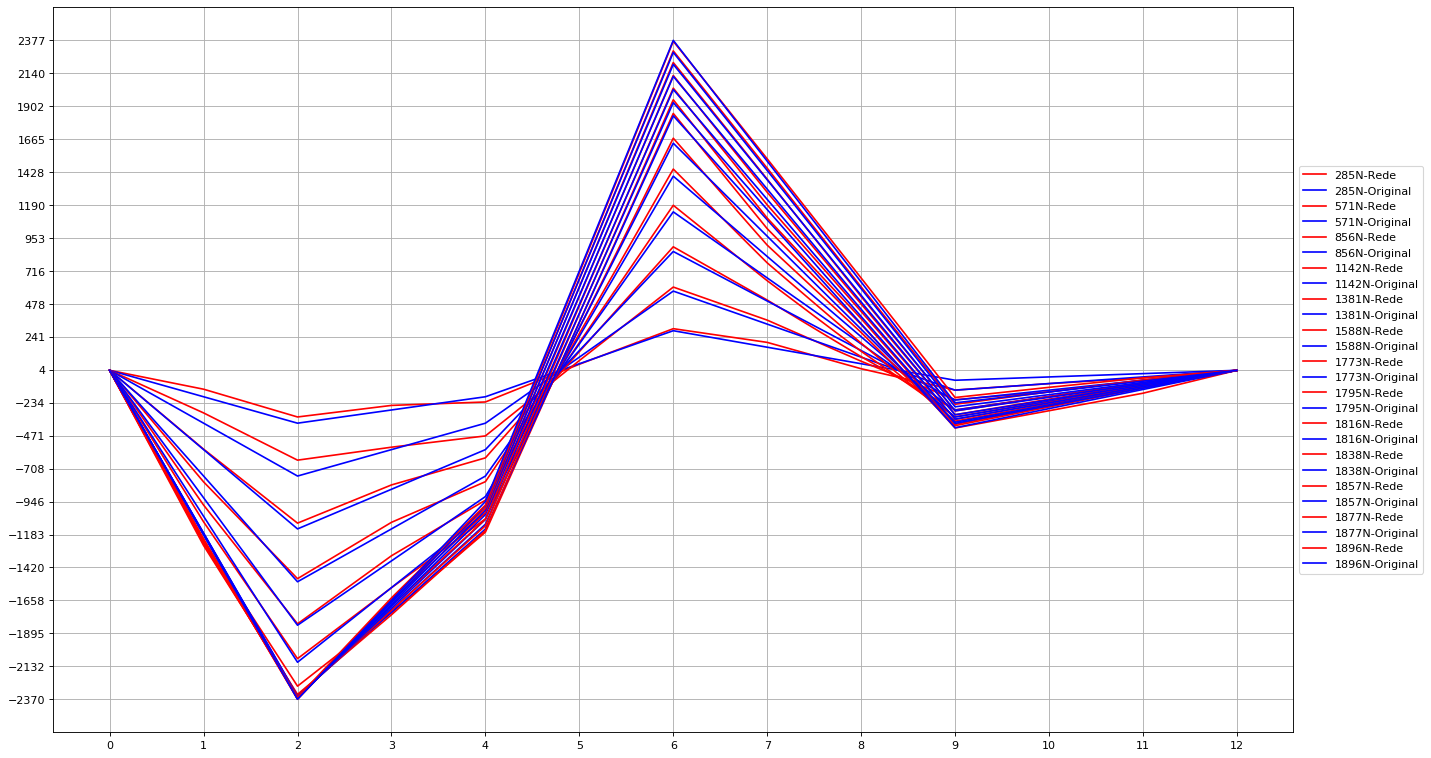

errors1
  [inf 8.004546973219991 3.202903580387678 2.6371444865897287
 7.180348155672853 4.978673259265669 2.35641389806558 5.412518621592942
 17.759834166132695 19.94937335214395 22.629551544842432 27.61595971444279
 inf]


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


In [16]:
make_graph(xticks,Inc_MOMENT_05,MOMENT05)

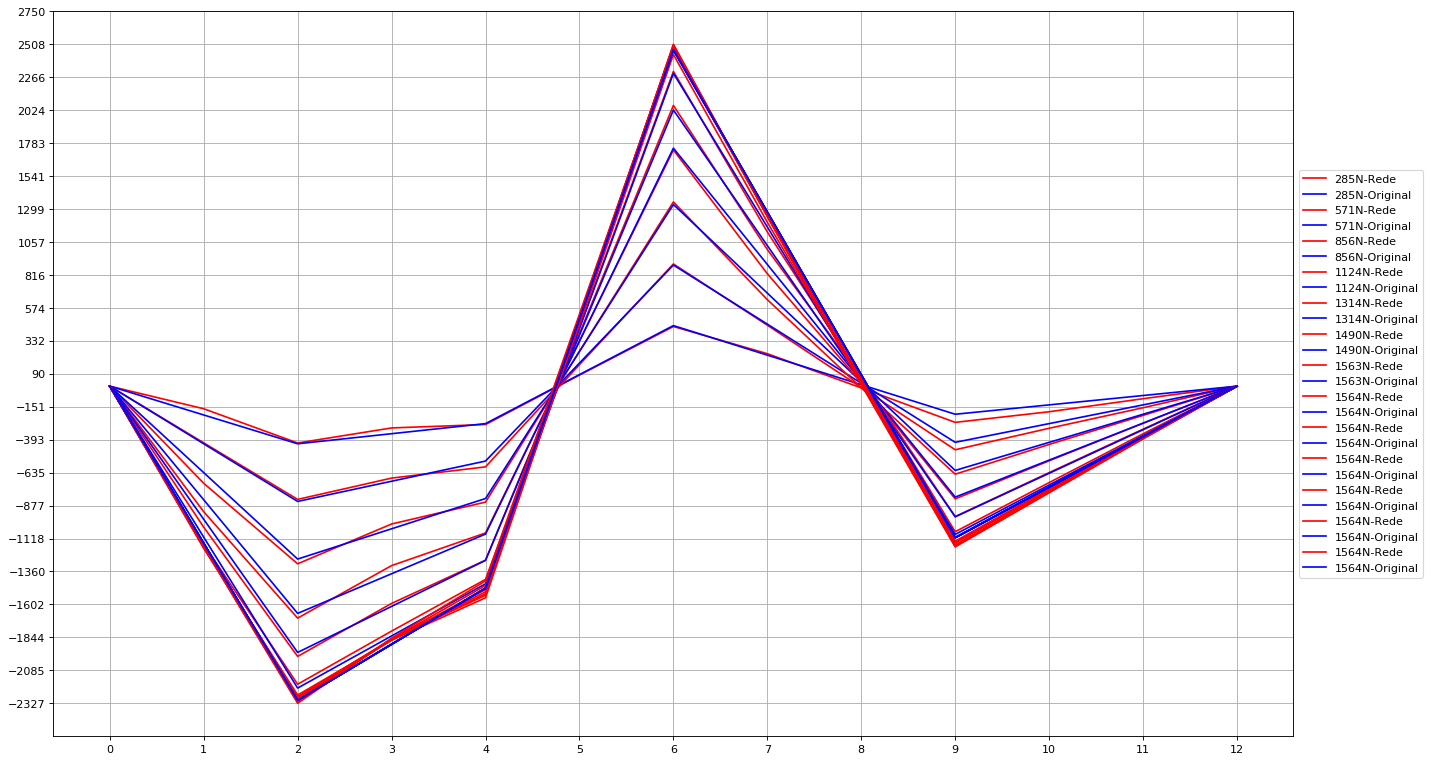

errors1
  [inf 5.999597549331152 1.3749006250829185 3.308895794430954
 2.896119917565628 3.6324271008212405 1.2263943007846545
 3.7561309829887457 93.57472213568357 6.732538595160291 6.907988236844037
 6.311789337843492 inf]


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


In [17]:
make_graph(xticks,Inc_MOMENT_1,MOMENT1)

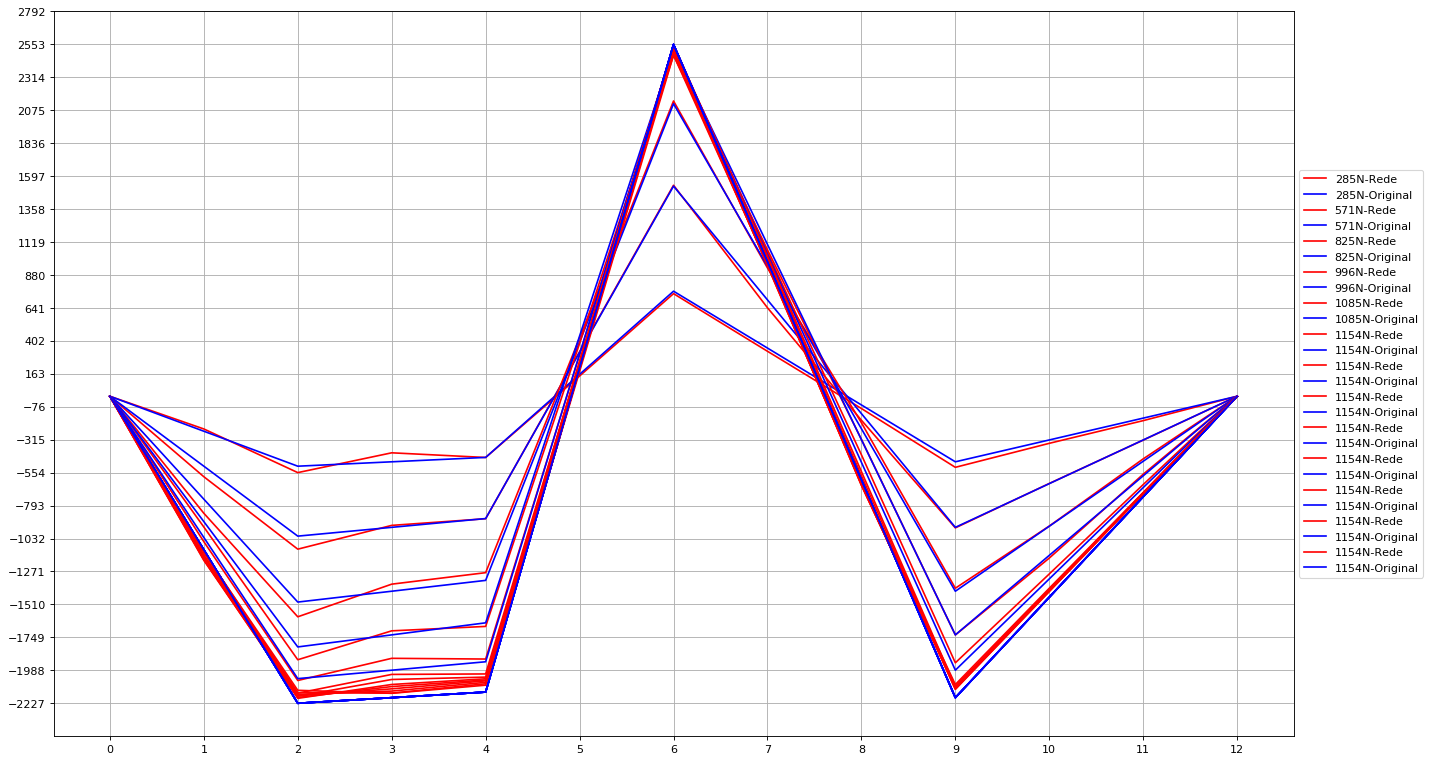

errors1
  [inf 6.455086597019478 4.460156309466727 4.563139201562066
 3.2548002768628335 12.50938170357999 1.1817697214752174
 3.0879894444778424 12.53246395159765 3.358707367148943 3.364068360935325
 4.094330750617868 inf]


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


In [18]:
make_graph(xticks,Inc_MOMENT_2,MOMENT2)

In [19]:
for ii in condition.index[0:20]:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    print(X[ii,:,0],Ls[ii,:,0])
    
    maximo = max([max(y_pred1[ii,:]),max(Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(Y[ii,:])])
        
    plt.plot(Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    plt.plot(Inc_MOMENT[0,:],label='before')
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(Ls[ii,i,0]*LPF[ii,0]), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()


NameError: name 'condition' is not defined